## 1-Reading the data
#### Let's read the uploaded image file. We will use this file throughout this notebook. We will use "OpenCV" library to read the image and make changes to it.

In [1]:
import cv2

image = cv2.imread('../../img/amazon_image.png')

# Let's check the type of this image data
print("Type:", type(image))

# See the shape of it
print("Shape:", image.shape)

Type: <class 'numpy.ndarray'>
Shape: (325, 579, 3)


## 2-Showing the image
#### We will use the "matplotlib" library. Let's plot the image below. There are a few points here. 
* OpenCV store image channels in this order: __Blue Green Red__ (ATTENTION HERE!)
* Without changing the order it will look like below

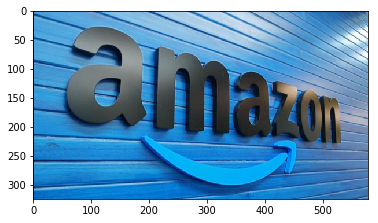

In [3]:
import matplotlib.pyplot as plt

plt.imshow(image)
plt.show()

* We can change the order to __Red Green Blue__ using the __cvtColor()__ function below. 

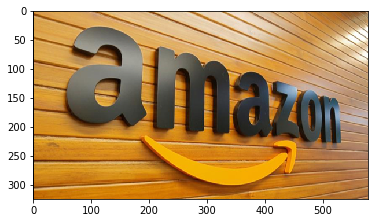

In [4]:
image_color_order_changed = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_color_order_changed)
plt.show()

Let's get three images for the three channels: Blue, Green and Red and plot them

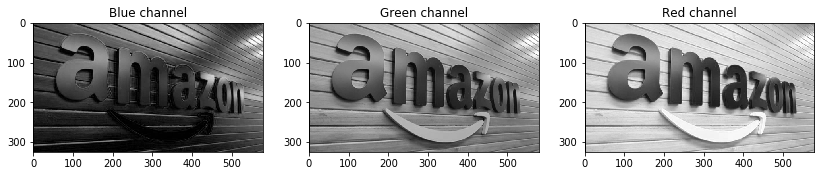

In [5]:
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(14, 28))
color_channels = {1: 'Blue channel', 2: 'Green channel', 3:'Red channel'}
for i in range(0, 3):
    # Get the corresponding color channel, last index is color index (channel)
    image_channel = image[:, :, i]
    fig.add_subplot(1, 3, i+1)
    # Plot the channel image and add title
    plt.imshow(image_channel, cmap='gray')
    plt.title(color_channels[i+1])
plt.show()

## 3-Resizing Images
#### We will use __resize()__ function to fit the images to a desired size. Our original image has __325 rows__ and __579 columns__. Let set the rows and columns to __120__ and __250__ respectively. 

#### We can try different resizing methods with OpenCV. We call those methods __Interpolation Methods__:
* __Nearest neighbor interpolation (cv2.INTER_NEAREST):__ Applies nearest neighbor interpolation. In this method, the nearest pixel values are copied over. This usually results in not very pleasent results. The image mostly looks jagged.
* __Linear interpolation (cv2.INTER_LINEAR):__ Applies linear interpolation. It fixes the jagged appereance we have after nearest neighbor interpolation by averaging pixel values. Gives smoother results than nearest neighbor method.
* __Bicubic interpolation (cv2.INTER_CUBIC):__ Applies bicubic interpolation. It usually gives smoother results than linear interpolation.


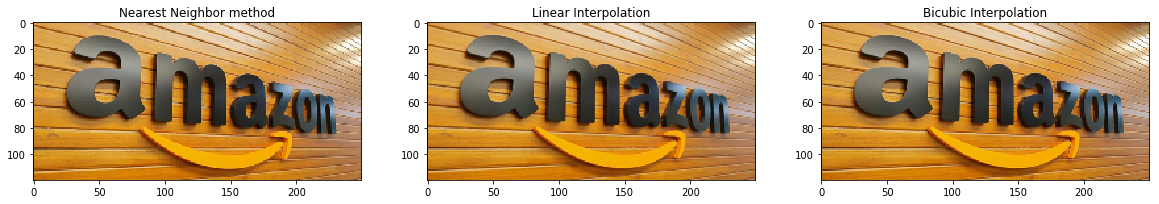

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Let's use the RGB channel image
image_color_order_changed = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

fig=plt.figure(figsize=(20, 50))

nearest_neighbor_resized_im = cv2.resize(image_color_order_changed, dsize=(250, 120), interpolation=cv2.INTER_NEAREST)
linear_interp_resized_im = cv2.resize(image_color_order_changed, dsize=(250, 120), interpolation=cv2.INTER_LINEAR)
bicubic_interp_resized_im = cv2.resize(image_color_order_changed, dsize=(250, 120), interpolation=cv2.INTER_CUBIC)

fig.add_subplot(1, 3, 1)
plt.imshow(nearest_neighbor_resized_im)
plt.title('Nearest Neighbor method')

fig.add_subplot(1, 3, 2)
plt.imshow(linear_interp_resized_im)
plt.title('Linear Interpolation')

fig.add_subplot(1, 3, 3)
plt.imshow(bicubic_interp_resized_im)
plt.title('Bicubic Interpolation')

plt.show()